# 데이터
- 변수의 개념으로 바라보면 여러가지 정의된 것들이 있다.

<변수>
- 양적변수 : 양을 표현하는 것, 학교 시험 점수나, 우리 키, 몸무게
- 질적변수 : 안경을 쓴 유무, 서베이의 만족도 조사 점수

변수를 가지고 척도를 생각해 보자!

<양적변수>
- 간격척도 : 온도 ( 30도와 60도가 정말 2배의 차이인 것이냐? 절대 영점의 유무 )
- 비례척도 : 길이 ( 2배 차이가 많다. 5cm 10cm는 2배의 차이 )

<질적변수>
- 명의척도 : 성별, 학생번호, 전화번호, 주민번호
- 순서척도 : 시험 점수 등수 ( 반별 등수 )

<이산형, 연속형>
- 이산형 : 0,1 이진분류, 만족도 점수 같은, 여러가지 값이 있지만 -> 서로 인접한 숫자 사이의 값이 존재하지 않는다.0, 1 두 개만 존재하지 1.5 x 없다.
- 연속형 : 연속적인 값 0,1 기준으로 보면 무한대 0.001 ,0.0002 중간에 값이 다 존재 연속적인 값 무게 등 대표적

### 이산형, 연속형을 가지고 바라보는 ML, 통계적인 분석들이 다를 것

머신러닝 - 회귀, 분류
통계분석 - 가설검정, 정규성, 순서관련한 다양한 통계적 분석, 검정들

### 변수에 따라서 -> 척도에 따라서 -> 이산형, 연속형에 따라서 접근을 다르게 해야 한다!

- 기초통계
- 평균
- 중앙값
- 최빈값
- 편차
- 분산
- 표준편차
- 범위 : IQR의 개념

In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_excel('kbo 순위.xlsx')

In [8]:
df

,순위,팀,경기수,승,패,무,승률
0,1,LG,119,70,47,2,0.598
1,2,KT,122,66,53,3,0.555
2,3,NC,117,63,52,2,0.548
3,4,KIA,114,60,52,2,0.536
4,5,SSG,119,62,55,2,0.530
5,6,두산,117,59,57,1,0.509
6,7,롯데,118,55,63,0,0.466
7,8,한화,118,50,62,6,0.446
8,9,삼성,121,51,69,1,0.425
9,10,키움,131,51,77,3,0.398


In [9]:
len(df)

10

In [10]:
sum((df['경기수']))/len(df) #평균

119.6

In [12]:
df_match=np.sort(np.array(df['경기수'])) #sort 함수 이용해서 오름차순 배열 #numpy 배열

In [13]:
df_match

array([114, 117, 117, 118, 118, 119, 119, 121, 122, 131], dtype=int64)

In [14]:
np.median(df_match) #중앙값

118.5

In [15]:
pd.Series(df_match).mode() #최빈값
# mode 함수는 판다스 시리즈에서만 사용 가능
# mode를 사용 

0    117
1    118
2    119
dtype: int64

In [16]:
df_1=df.query('승률>=0.500')
df_2=df.query('승률<0.500')

In [19]:
df_1_m=np.mean(df_1['승률'])
df_2_m=np.mean(df_2['승률'])

In [20]:
df_1_m

0.546

In [21]:
df_2_m

0.43374999999999997

In [24]:
df_1['승률편차']=df_1['승률'] - df_1_m
df_2['승률편차']=df_2['승률'] - df_2_m

C:\Users\rnrwnsgh\AppData\Local\Temp\ipykernel_604\10161751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['승률편차']=df_1['승률'] - df_1_m
C:\Users\rnrwnsgh\AppData\Local\Temp\ipykernel_604\10161751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['승률편차']=df_2['승률'] - df_2_m


In [25]:
df_1['승률편차'] #편차

0    0.052
1    0.009
2    0.002
3   -0.010
4   -0.016
5   -0.037
Name: 승률편차, dtype: float64

In [26]:
df_2['승률편차'] #편차

6    0.03225
7    0.01225
8   -0.00875
9   -0.03575
Name: 승률편차, dtype: float64

In [27]:
np.mean(df_1.승률편차**2) #분산

0.0007523333333333328

In [28]:
np.var(df_1['승률']) #분산

0.0007523333333333328

# 표준편차
- 분산에 제곱근 취한 표준편차

## 범위

<사분위 범위수>

- 데이터의 하위 25% , 50% 75% 범위를 나누는 것
- Q1, Q2, Q3 제1사분위수 , 제2사분위수 , 제3사분위수
- IQR : Q3- Q1 뺀 범위수를 IQR

In [37]:
np.percentile(df_1['승률'],25)

0.5315000000000001

In [38]:
np.percentile(df_1['승률'],50)

0.542

In [39]:
np.percentile(df_1['승률'],75)

0.55325

In [40]:
df_1.describe()

,순위,경기수,승,패,무,승률,승률편차
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000e+00
mean,3.500000,118.000000,63.333333,52.666667,2.000000,0.546000,-1.850372e-17
std,1.870829,2.683282,4.082483,3.386247,0.632456,0.030047,3.004663e-02
min,1.000000,114.000000,59.000000,47.000000,1.000000,0.509000,-3.700000e-02
25%,2.250000,117.000000,60.500000,52.000000,2.000000,0.531500,-1.450000e-02
50%,3.500000,118.000000,62.500000,52.500000,2.000000,0.542000,-4.000000e-03
75%,4.750000,119.000000,65.250000,54.500000,2.000000,0.553250,7.250000e-03
max,6.000000,122.000000,70.000000,57.000000,3.000000,0.598000,5.200000e-02


- describe 함수가 있다고 해서 위의 지표들이 나오는 과정을 몰라서는 안된다.
- 데이터를 보고 이해할 때 그 뒤에 배경들을 꼭 잘 알고 있어야 한다.

# 정규화
- 통일된 지표를 만들려고 한다.
- 비교를 하기 위해서 값을 어떤 통일된 범위로 만들어서 비교하려고 하는 것
- z-score 정규화

C:\Users\rnrwnsgh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='경기수', ylabel='Density'>

C:\Users\rnrwnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rnrwnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rnrwnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


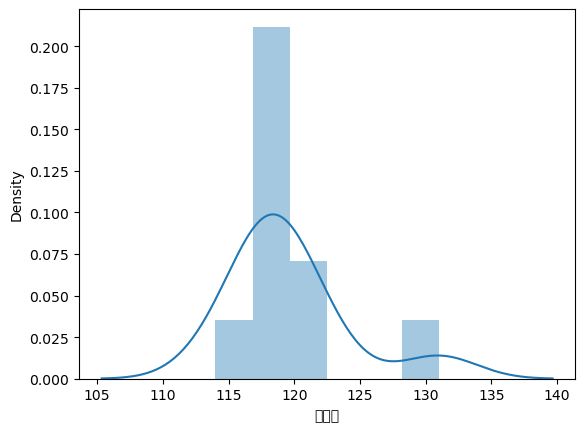

In [41]:
import seaborn as sns

sns.distplot(df['경기수'])  #seaborn을 임포트하면 히스토그램 함수 불러올 수 있다.

In [42]:
tip=sns.load_dataset('tips')

In [43]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:>

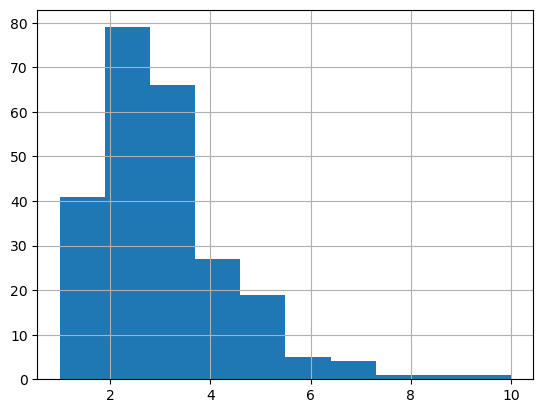

In [44]:
tip['tip'].hist()  # hist() : 히스토그램 그래프 출력하는 함수

C:\Users\rnrwnsgh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

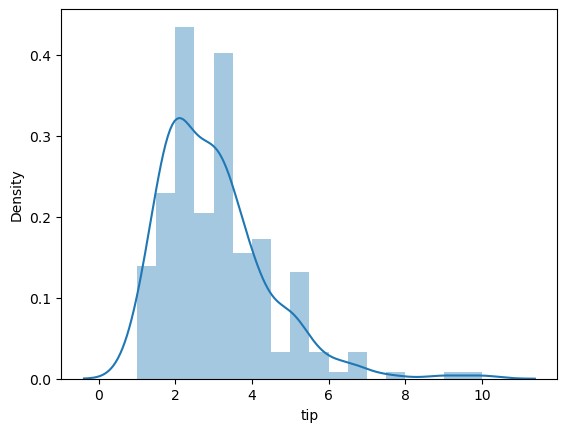

In [45]:
sns.distplot(tip['tip'])

# z스코어 공식

- (자료값-평균)/표준편차

In [46]:
z_tips=(tip['tip'] - np.mean(tip['tip']))/ np.std(tip['tip'])

In [47]:
z_tips

0     -1.439947
1     -0.969205
2      0.363356
3      0.225754
4      0.443020
         ...   
239    2.115963
240   -0.722971
241   -0.722971
242   -0.904026
243    0.001247
Name: tip, Length: 244, dtype: float64

<AxesSubplot:>

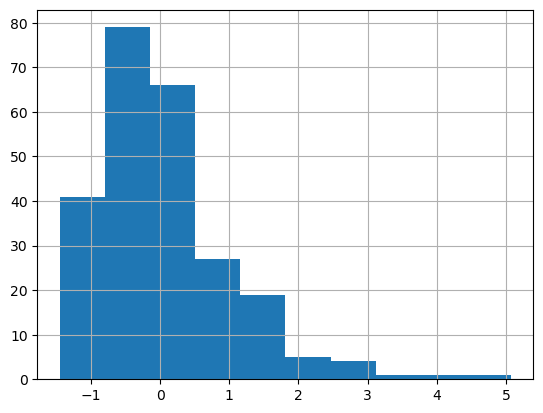

In [48]:
z_tips.hist()

In [49]:
z_log_tips=np.log10(tip['tip']) #로그 스케일링을 이용해 정규화도 가능하다

In [50]:
z_log_tips

0      0.004321
1      0.220108
2      0.544068
3      0.519828
4      0.557507
         ...   
239    0.772322
240    0.301030
241    0.301030
242    0.243038
243    0.477121
Name: tip, Length: 244, dtype: float64

<AxesSubplot:>

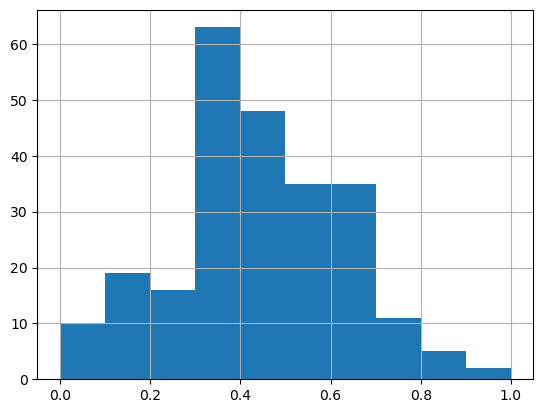

In [51]:
z_log_tips.hist()